<h1><center>INFORMASI DIRI</center></h1>


**Rifqi arrayan muttaqien**

![an image](https://img.icons8.com/material-two-tone/2x/incoming-call.png)
**089509099380**

![an image](https://img.icons8.com/fluent-systems-regular/2x/gmail.png)
**rifqiarrayan27@gmail.com**

![an image](https://img.icons8.com/material-rounded/2x/address.png)
**jakarta timur**

![an image](https://img.icons8.com/fluent-systems-filled/2x/linkedin.png)
[Linkedin](https://www.linkedin.com/in/rifqi-arrayan-muttaqien-71268521b/)

# Rock-Paper-Scissors Image Classification with CNN

In [22]:

# Import library yang dibutuhkan
import tensorflow as tf
import zipfile,os,shutil
import numpy as np
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#penjelasan
#import tensorflow as tf:
#Mengimpor TensorFlow, sebuah library open-source yang digunakan untuk membangun dan melatih model deep learning, seperti jaringan saraf tiruan.

#import zipfile, os, shutil:
#zipfile: Digunakan untuk mengekstrak file dari arsip ZIP.
#os: Modul ini menyediakan fungsi untuk berinteraksi dengan sistem operasi, seperti mengelola direktori dan file.
#shutil: Digunakan untuk operasi file dan direktori yang lebih kompleks seperti menyalin dan memindahkan file.

#import numpy as np:
#Mengimpor NumPy, library yang digunakan untuk perhitungan numerik yang efisien, terutama untuk operasi matriks dan array

#from tensorflow.keras.optimizers import RMSprop:
#Mengimpor optimizer RMSprop dari Keras, yang digunakan untuk memperbarui bobot jaringan saraf selama pelatihan. RMSprop adalah algoritma optimasi yang sering digunakan untuk masalah dengan gradien yang bervariasi secara dinamis.

# from tensorflow.keras.preprocessing.image import ImageDataGenerator:
# Mengimpor ImageDataGenerator, yang digunakan untuk augmentasi gambar (modifikasi seperti rotasi, zoom, dan flip) secara real-time selama proses pelatihan untuk meningkatkan performa model.

# from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint:
# TensorBoard: Callback yang digunakan untuk memvisualisasikan metrik pelatihan dan validasi model seperti loss dan akurasi secara real-time.
# ModelCheckpoint: Callback yang digunakan untuk menyimpan model secara otomatis selama pelatihan berdasarkan kriteria tertentu (misalnya, saat akurasi atau loss terbaik tercapai).

# from sklearn.model_selection import train_test_split:
# Mengimpor fungsi train_test_split dari Scikit-learn, digunakan untuk memisahkan dataset menjadi dua bagian: data pelatihan dan data pengujian.

# import matplotlib.pyplot as plt:
# Mengimpor Matplotlib untuk memvisualisasikan data seperti menampilkan grafik hasil pelatihan model (loss, akurasi, dll.).


In [23]:

# Load Dataset
!wget --no-check-certificate \
        https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
        -O /tmp/rockpaperscissors.zip

#!wget adalah fungsi untuk mengunduh file dari internet.
# --no-check-certificate untuk mengabaikan proses autentikasi SSL (Secure Sockets Layer) yang biasa dilakukan secara otomatis ketika mengunduh file dari internet. 
#-O untuk menetapkan direktori tempat file yang akan diunduh ke direktori aktif sesuai direktori aktif.(bukan di laptop kita tetapi di server cloud misalnya google colab)


--2024-09-19 07:23:01--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 20.60.139.65
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|20.60.139.65|:443... connected.
HTTP request sent, awaiting response... 404 The specified resource does not exist.
2024-09-19 07:23:03 ERROR 404: The specified resource does not exist..



In [24]:

# Inisialisasi data generator untuk augmentasi gambar
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4  # Menggunakan 40% untuk validation
)

# Setup training dan validation generator
train_generator = train_datagen.flow_from_directory(
    dataset_folder,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # 60% data untuk training
)

validation_generator = train_datagen.flow_from_directory(
    dataset_folder,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # 40% data untuk validation
)

#penjelasan
#ImageDataGenerator adalah alat yang sangat berguna untuk memperluas jumlah data pelatihan dengan menciptakan variasi dari data asli, sehingga model lebih tahan terhadap overfitting.
#rescale=1.0/255 adalah untuk Secara default, nilai piksel gambar berada dalam rentang 0 hingga 255. Dengan melakukan rescaling dengan nilai 1.0/255, setiap piksel gambar diubah menjadi rentang 0 hingga 1, yang lebih umum untuk digunakan dalam deep learning agar jaringan saraf bisa bekerja lebih baik.
# rotation_range=20:Rotasi acak gambar hingga sudut maksimum 20 derajat. Ini berarti gambar akan diputar secara acak dalam kisaran -20 hingga +20 derajat selama augmentasi.
# width_shift_range=0.2:Pergeseran acak gambar secara horizontal (lebar) hingga 20% dari total lebar gambar. Gambar bisa digeser ke kiri atau kanan sebanyak 20% dari lebar gambar aslinya.
# height_shift_range=0.2:Pergeseran acak gambar secara vertikal (tinggi) hingga 20% dari total tinggi gambar. Gambar bisa digeser ke atas atau bawah sebanyak 20% dari tinggi gambar aslinya.
# shear_range=0.2:Menerapkan transformasi geser pada gambar. Shearing (pergeseran) adalah jenis deformasi yang mirip dengan memiringkan gambar, yang dapat membuat gambar terlihat seperti dipindahkan di sepanjang sumbu.
# zoom_range=0.2: Memperbesar atau memperkecil gambar secara acak dalam kisaran hingga 20%. Dengan ini, gambar akan di-zoom secara acak hingga ±20%.
#horizontal_flip=True:Membalik gambar secara horizontal secara acak. Ini berarti gambar bisa diputar balik (mirrored) pada sumbu vertikalnya, menciptakan efek flip ke kiri atau ke kanan.
#validation_split=0.4:Menggunakan 40% dari data untuk validasi dan 60% untuk pelatihan. Ini adalah cara untuk memisahkan data pelatihan dan validasi dari dataset yang sama secara langsung.

# Fungsi flow_from_directory() digunakan untuk mengambil gambar dari folder yang diorganisir dalam sub-folder berdasarkan kelas. Setiap sub-folder di dalam dataset_folder mewakili satu kelas, dan gambar-gambar di dalamnya akan otomatis diberi label sesuai dengan nama foldernya.
# Hasilnya adalah generator yang menghasilkan batch gambar dan labelnya secara otomatis.
#dataset_folder Dataset ini diatur dalam sub-folder, di mana setiap sub-folder mewakili satu kelas gambar. Misalnya, jika kamu sedang melatih model untuk mengenali kucing dan anjing, maka folder dataset harus memiliki sub-folder dengan nama seperti cats dan dogs.
#target_size=(150, 150):Gambar akan diubah ukurannya secara otomatis menjadi 150x150 piksel sebelum masuk ke dalam jaringan saraf. Hal ini memastikan bahwa semua gambar memiliki dimensi yang sama, yang diperlukan oleh model.
#batch_size=32:Menentukan ukuran batch yang akan dihasilkan oleh generator dalam sekali iterasi. Dalam hal ini, setiap batch akan berisi 32 gambar. Melatih model dengan batch memungkinkan penghematan memori dan mempercepat pelatihan.
#class_mode='categorical':Menentukan bagaimana label target dihasilkan. Dalam kasus ini, categorical digunakan karena dataset melibatkan klasifikasi multi-kelas, sehingga label akan dikonversi menjadi vektor kategori one-hot encoding. Setiap kelas akan diwakili oleh vektor biner, di mana satu kelas diberi nilai 1 dan yang lainnya diberi nilai 0.
#subset='training':Mengambil subset data yang akan digunakan untuk pelatihan, yaitu 60% dari dataset (karena pada ImageDataGenerator, validation_split=0.4 diatur sebelumnya, yang berarti 40% digunakan untuk validasi). Dengan parameter ini, hanya bagian dari dataset yang digunakan untuk pelatihan yang akan diproses oleh generator ini.

#validation_generator = train_datagen.flow_from_directory():menghasilkan batch gambar dan labelnya dari direktori yang terstruktur berdasarkan kelas. Namun, kali ini subset data yang dipilih adalah untuk validasi, bukan pelatihan.
#dataset_folder:Ini adalah path ke direktori yang berisi dataset gambar. Sama seperti pada generator pelatihan, folder ini diatur dengan sub-folder untuk setiap kelas gambar.
#target_size=(150, 150):Gambar akan diubah ukurannya menjadi 150x150 piksel sebelum diproses oleh model. Hal ini memastikan bahwa semua gambar yang digunakan untuk validasi memiliki ukuran yang seragam, seperti gambar yang digunakan untuk pelatihan.
#batch_size=32:Setiap batch akan berisi 32 gambar. Model akan memproses gambar dalam batch untuk menghindari masalah memori dan untuk efisiensi selama validasi.
#class_mode='categorical':Sama seperti pada train_generator, ini digunakan untuk klasifikasi multi-kelas. categorical memastikan bahwa label diubah menjadi format one-hot encoding, di mana setiap kelas diwakili oleh vektor biner (dengan nilai 1 untuk kelas yang benar dan 0 untuk lainnya).
#subset='validation':Data yang diambil oleh generator ini adalah bagian dari dataset yang akan digunakan untuk validasi (yaitu 40% dari total dataset, karena sebelumnya validation_split=0.4 diatur). Dengan parameter ini, hanya bagian dataset yang dialokasikan untuk validasi yang diproses oleh generator ini.


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [25]:

# Membangun model Sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 classes (rock, paper, scissors)
])

# Compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

#penjelasan
# Sequential():
# Ini berarti kita membuat model dengan urutan layer bertingkat. Layer ini adalah lapisan-lapisan pemrosesan data yang bekerja secara berurutan.
# Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)):
# Layer ini adalah Convolutional Layer, yang mengambil gambar sebagai input.
# 32: Jumlah filter yang akan digunakan. Filter adalah seperti "sensor" yang mencari pola pada gambar.
# (3, 3): Ukuran filter adalah 3x3, artinya filter akan mencari pola kecil dalam gambar.
# activation='relu': Fungsi aktivasi untuk menghilangkan nilai negatif dan mempertahankan nilai positif, sehingga model lebih efisien.
# input_shape=(150, 150, 3): Ukuran inputnya adalah gambar 150x150 piksel dengan 3 channel (karena gambar berwarna RGB memiliki 3 channel: merah, hijau, dan biru).
# MaxPooling2D(2, 2):
# Layer ini adalah Pooling Layer, yang mengurangi ukuran gambar dengan memilih nilai terbesar dari wilayah 2x2. Ini membantu mengurangi jumlah data yang diproses dan membuat model lebih efisien.
# Conv2D(64, (3, 3), activation='relu'):
# Ini adalah layer convolution kedua, tetapi kali ini menggunakan 64 filter. Model akan mencari pola yang lebih kompleks di sini.
# MaxPooling2D(2, 2):
# Pooling lagi untuk mengurangi ukuran gambar lebih lanjut.
# Conv2D(128, (3, 3), activation='relu'):
# Layer convolution ketiga, menggunakan 128 filter untuk mendeteksi pola yang lebih rinci.
# MaxPooling2D(2, 2):
# Pooling lagi untuk memperkecil gambar.
# Conv2D(128, (3, 3), activation='relu'):
# Layer convolution terakhir dengan 128 filter, bertujuan menangkap detail-detail kecil dari gambar.
# MaxPooling2D(2, 2):
# Pooling terakhir untuk mengurangi ukuran data.
# Flatten():
# Layer ini mengubah data 2D dari gambar menjadi bentuk 1D (seperti daftar), sehingga bisa digunakan oleh Dense Layer (layer fully connected).
# Dropout(0.5):
# Dropout ini mematikan (mengabaikan) 50% neuron secara acak selama pelatihan untuk mencegah overfitting (model terlalu hafal data latih).
# Dense(512, activation='relu'):
# Layer ini memiliki 512 neuron, dan berfungsi untuk memproses data dengan lebih mendalam sebelum membuat prediksi. Relu masih digunakan sebagai aktivasi.
# Dense(3, activation='softmax'):
# Layer terakhir, dengan 3 neuron, karena model akan melakukan klasifikasi ke dalam 3 kelas (batu, kertas, gunting).
# Softmax digunakan untuk mengubah output menjadi probabilitas (sehingga bisa memilih kelas mana yang paling mungkin benar).


# loss='categorical_crossentropy':
# Loss function adalah cara untuk mengukur seberapa baik atau buruk prediksi model dibandingkan dengan hasil yang diinginkan (label asli).
# categorical_crossentropy digunakan ketika kita memiliki lebih dari dua kelas untuk diprediksi, dan setiap gambar hanya termasuk satu kelas (ini cocok dengan kasus batu, kertas, gunting).
# Fungsi ini menghitung perbedaan antara distribusi probabilitas yang diprediksi oleh model dan distribusi sebenarnya dari kelas target.
# optimizer=tf.keras.optimizers.Adam():
# Optimizer adalah algoritma yang digunakan untuk meng-update bobot-bobot model selama pelatihan, agar loss berkurang dan prediksi model semakin akurat.
# Adam adalah salah satu optimizer yang sangat populer karena bekerja efisien pada banyak masalah dan otomatis mengatur learning rate, yang mempengaruhi seberapa besar langkah perubahan yang dilakukan dalam proses pelatihan.
# metrics=['accuracy']:
# Metrics digunakan untuk mengevaluasi performa model selama pelatihan dan pengujian.
# Accuracy menghitung persentase prediksi model yang benar dibandingkan dengan total data. Ini adalah metrik yang sangat umum digunakan dalam masalah klasifikasi untuk mengukur seberapa sering model memprediksi kelas yang benar.


In [26]:
import tensorflow as tf

# Bersihkan sesi TensorFlow
tf.keras.backend.clear_session()

# Custom callback untuk menghentikan pelatihan jika akurasi validasi sudah > 85%
class StopTrainingAtAccuracy(tf.keras.callbacks.Callback):
    def __init__(self, target_accuracy=0.85):
        super(StopTrainingAtAccuracy, self).__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        val_acc = logs.get("val_accuracy")
        if val_acc >= self.target_accuracy:
            print(f"\nAkurasi validasi mencapai {val_acc*100:.2f}% pada epoch {epoch+1}, menghentikan pelatihan...")
            self.model.stop_training = True

# Buat instance dari callback
stop_at_85_callback = StopTrainingAtAccuracy(target_accuracy=0.85)

# Train model dengan early stopping agar tidak overfitting dan callback penghentian otomatis
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Latih model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20,  # Batasi ke 20 epoch agar waktu training tidak melebihi 30 menit
    callbacks=[early_stop, stop_at_85_callback]  # Callback untuk menghentikan pelatihan otomatis saat akurasi lebih dari 85%
)

# Evaluasi model
acc = model.evaluate(validation_generator)[1] * 100
print(f"Akurasi validation: {acc:.2f}%")

# Save model
model.save('rps_model.h5')

#penjelasan kode
#tf.keras.backend.clear_session():berfungsi untuk membersihkan sesi atau mengatur ulang status TensorFlow yang ada sebelumnya. Ini dilakukan agar tidak ada variabel atau objek yang mengganggu sesi baru.

#pada fungsi StopTrainingAtAccuracy dan on_epoch_end berfungsi untuk  mendefinisikan callback kustom yang akan menghentikan pelatihan jika akurasi validasi (val_accuracy) sudah mencapai target tertentu, yaitu 85%.target_accuracy=0.85: Callback akan menghentikan pelatihan jika akurasi validasi melebihi 85%.
#on_epoch_end: Fungsi ini dipanggil di akhir setiap epoch. Jika akurasi validasi (val_accuracy) lebih besar atau sama dengan 85%, maka pelatihan akan dihentikan dengan self.model.stop_training = True.

#stop_at_85_callback = StopTrainingAtAccuracy(target_accuracy=0.85)
#Membuat instance dari callback StopTrainingAtAccuracy, yang digunakan untuk menghentikan pelatihan secara otomatis ketika akurasi validasi mencapai 85%.

#early stop:callback yang akan menghentikan pelatihan jika val_loss (kerugian pada validasi) tidak membaik setelah sejumlah epoch tertentu.monitor='val_loss': Ini memantau kerugian validasi.
#patience=3: Ini berarti jika val_loss tidak membaik selama 3 epoch berturut-turut, pelatihan akan dihentikan. Ini membantu menghindari overfitting.

#history = model.fit( digunakan untuk Proses melatih model menggunakan data latih dan data validasi dengan batas maksimal 20 epoch dan menggunakan dua callback: early_stop untuk menghentikan pelatihan jika val_loss tidak membaik, serta stop_at_85_callback untuk menghentikan pelatihan jika akurasi validasi mencapai 85%.
# steps_per_epoch: Jumlah batch per epoch untuk data latih.
# validation_steps: Jumlah batch untuk validasi pada setiap epoch.
# callbacks: List berisi callback yang digunakan selama pelatihan.

#Setelah model selesai dilatih, model dievaluasi menggunakan data validasi. Hasil evaluasi berupa akurasi validasi kemudian ditampilkan dalam format persentase.

# model.save('rps_model.h5')
# Penjelasan: Model yang telah dilatih disimpan dalam format .h5. Model ini bisa digunakan kembali untuk prediksi di masa depan tanpa perlu melatih ulang.


Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.3286 - loss: 1.1209 - val_accuracy: 0.5660 - val_loss: 0.9998
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 485ms/step - accuracy: 0.5312 - loss: 0.9802 - val_accuracy: 0.2000 - val_loss: 1.1237
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.4666 - loss: 1.0653 - val_accuracy: 0.7662 - val_loss: 0.6211
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7812 - loss: 0.6013 - val_accuracy: 0.7000 - val_loss: 0.6107
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.7344 - loss: 0.6463 - val_accuracy: 0.8171 - val_loss: 0.4850
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8125 - loss: 0.5694 - val_accuracy: 0.6000 - val_loss: 0.8265
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8047 - loss: 0.4789
Akurasi validasi mencapai 87.73% pada epoch 7, menghentikan pelatihan...
41/41 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.8049 - loss: 0.4785 - val_accur

Akurasi validation: 86.38%


Saving WhatsApp Image 2024-09-19 at 13.33.14.jpeg to WhatsApp Image 2024-09-19 at 13.33.14.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


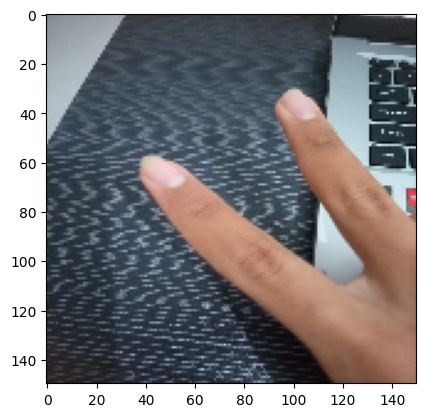

In [17]:
# Setelah model dilatih dan disimpan, kode ini digunakan untuk mengunggah gambar baru dan memprediksi kelas dari gambar tersebut menggunakan model yang telah dilatih.
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

#penjelasan 
  #for fn in uploaded.keys():
    # path = fn
    # img = image.load_img(path, target_size =(150,150))
    # imgplot = plt.imshow(img)
  #Gambar yang diunggah diproses dengan image.load_img() dan diubah ukurannya menjadi 150x150 piksel, ukuran yang sama seperti yang digunakan saat melatih model.Gambar kemudian ditampilkan menggunakan Matplotlib dengan plt.imshow(img).

#   x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# images = np.vstack([x])
#gambar diubah menjadi array dengan image.img_to_array(img) agar dapat diproses oleh model.Kemudian, array tersebut ditambahkan dimensi tambahan menggunakan np.expand_dims(x, axis=0) untuk menyesuaikan input model (batch size, width, height, channels).

#classes = model.predict(images, batch_size=10)
#Gambar yang sudah dalam format array diprediksi menggunakan model yang telah dilatih sebelumnya. Model akan memberikan output berupa prediksi kelas dari gambar (misalnya: gunting, batu, atau kertas).




In [19]:
print(fn)
if classes[0, 0] != 0:
    print('Gunting')
elif classes[0, 1] != 0:
    print('Batu')
else:
    print('Kertas')

#penjelasan
#print(fn):Mencetak nilai variabel fn. Variabel ini mungkin berisi informasi tentang nama file gambar atau objek lain yang terkait dengan gambar yang diprediksi.
# if classes[0, 0] != 0::Di sini, classes mungkin merupakan output prediksi dari model. Misalnya, output model untuk klasifikasi multi-kelas sering berupa array atau matriks probabilitas.
# classes[0, 0] mengacu pada nilai prediksi untuk kelas pertama (misalnya, kelas "Gunting"). Jika nilainya tidak sama dengan 0, berarti model memprediksi bahwa gambar tersebut adalah "Gunting".
# elif classes[0, 1] != 0::Jika kondisi pertama tidak terpenuhi, maka periksa apakah nilai prediksi untuk kelas kedua (misalnya, "Batu") tidak sama dengan 0. Jika benar, maka gambar diprediksi sebagai "Batu".
# else::Jika kedua kondisi di atas tidak terpenuhi, maka secara default gambar diprediksi sebagai "Kertas".


WhatsApp Image 2024-09-19 at 13.33.14.jpeg
Gunting
